<a href="https://colab.research.google.com/github/BadrisRahmatullah/MachineLearning/blob/main/CNN3ModelML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tulis Program Anda Disini!
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

# Imports untuk membangun CNN
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install kaggle

In [ ]:
import os
import shutil
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

In [ ]:
api_token = {"username":"badrisrahmatullah","key":"840ee4c0ecea7a89fced6bcda3ad33a3"}
import json
import zipfile
import os
with open('/content/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /content/kaggle.json

In [ ]:
!kaggle datasets download -d forderation/breakhis-400x

 98% 785M/803M [00:19<00:00, 34.2MB/s]
100% 803M/803M [00:19<00:00, 43.8MB/s]


In [ ]:
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
base_dir = '/content/BreaKHis 400X'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_benign_dir = os.path.join(train_dir, 'benign')
train_malignant_dir = os.path.join(train_dir, 'malignant')

test_benign_dir = os.path.join(test_dir, 'benign')
test_malignant_dir = os.path.join(test_dir, 'malignant')

In [ ]:
# Cek penamaan image yang ada di folder train_benign_dir dan train_malignant_dir
print(os.listdir(train_benign_dir)[:10])
print(os.listdir(train_malignant_dir)[:10])

['SOB_B_F-14-9133-400-011.png', 'SOB_B_F-14-14134-400-022.png', 'SOB_B_F-14-14134-400-013.png', 'SOB_B_TA-14-15275-400-010.png', 'SOB_B_F-14-9133-400-016.png', 'SOB_B_F-14-21998CD-400-006.png', 'SOB_B_PT-14-21998AB-400-003.png', 'SOB_B_TA-14-13200-400-008.png', 'SOB_B_F-14-21998EF-400-021.png', 'SOB_B_A-14-22549G-400-012.png']
['SOB_M_DC-14-20636-400-001.png', 'SOB_M_PC-14-15704-400-025.png', 'SOB_M_DC-14-4372-400-015.png', 'SOB_M_DC-14-14946-400-001.png', 'SOB_M_DC-14-16875-400-005.png', 'SOB_M_DC-14-16448-400-005.png', 'SOB_M_DC-14-2773-400-032.png', 'SOB_M_DC-14-12312-400-019.png', 'SOB_M_DC-14-8168-400-002.png', 'SOB_M_DC-14-12312-400-001.png']


In [ ]:
print('total training benign images:', len(os.listdir(train_benign_dir)))
print('total training malignant images:', len(os.listdir(train_malignant_dir)))
print('total test benign images:', len(os.listdir(test_benign_dir)))
print('total test malignant images:', len(os.listdir(test_malignant_dir)))

total training benign images: 371
total training malignant images: 777
total test benign images: 176
total test malignant images: 369


In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

training_set = train_datagen.flow_from_directory("/content/BreaKHis 400X/train",
                                                 target_size=(128,128),
                                                 color_mode="rgb",
                                                 shuffle=False,
                                                 batch_size = 8,
                                                 class_mode='binary')

Found 1148 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        rescale=1./255,
                                        shear_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')

test_set = test_datagen.flow_from_directory("/content/BreaKHis 400X/test",
                                                        target_size=(128,128),
                                                        color_mode="rgb",
                                                        shuffle=False,
                                                        batch_size = 8,
                                                        class_mode='binary')

Found 545 images belonging to 2 classes.


In [ ]:
train_path = os.path.join(base_dir, 'train')
test_path  = os.path.join(base_dir, 'test')

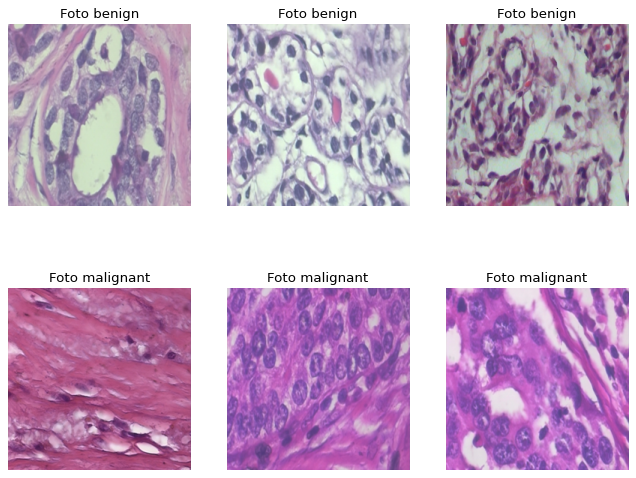

In [ ]:
train_normal_images = glob(train_path+"/benign/*")
train_pneumonia_images = glob(train_path+"/malignant/*")

plt.figure(figsize=(10, 8), dpi=80)
init_subplot = 230
for i in range(1, 7):
    plt.subplot(init_subplot + i)
    
    if i < 4:
        img = Image.open(np.random.choice(train_normal_images)).resize((244, 244))
        plt.title("Foto benign")
    else:
        img = Image.open(np.random.choice(train_pneumonia_images)).resize((244, 244))
        plt.title("Foto malignant")
        
    img = np.asarray(img)
    plt.axis('off')
    plt.imshow(img)

In [ ]:
IMAGE_SIZE = [224, 224]

categories = ["benign", "malignant"]

In [ ]:
# Menambahkan Layer untuk Preprocessing pada VGG
vgg16 = VGG16(input_shape = IMAGE_SIZE + [3], 
            weights = 'imagenet',
            include_top=False)


# Untuk perintah menolak men training data yang telah digunakan sebelumnya
for layer in vgg16.layers:
  layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
x = Flatten()(vgg16.output)
x = Dense(1000, activation='relu')(x)

# Lapisan Terakhir dengan aktivasi sigmoid untuk output biner 
prediction = Dense(len(categories), activation='sigmoid')(x)

In [ ]:
# Membuat obbjek model 
model = Model(inputs=vgg16.input, outputs=prediction)

# Melihat struktur model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1148 images belonging to 2 classes.
Found 545 images belonging to 2 classes.


In [ ]:
# Mencocokan model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
36/36 [==============================] - 67s 1s/step - loss: 2.0590 - accuracy: 0.6463 - val_loss: 0.5936 - val_accuracy: 0.7596
Epoch 2/50
36/36 [==============================] - 39s 1s/step - loss: 0.4989 - accuracy: 0.8014 - val_loss: 0.5457 - val_accuracy: 0.8147
Epoch 3/50
36/36 [==============================] - 38s 1s/step - loss: 0.3472 - accuracy: 0.8772 - val_loss: 0.4627 - val_accuracy: 0.7945
Epoch 4/50
36/36 [==============================] - 38s 1s/step - loss: 0.3759 - accuracy: 0.8467 - val_loss: 0.6143 - val_accuracy: 0.8569
Epoch 5/50
36/36 [==============================] - 39s 1s/step - loss: 0.2927 - accuracy: 0.8876 - val_loss: 0.3889 - val_accuracy: 0.8495
Epoch 6/50
36/36 [==============================] - 39s 1s/step - loss: 0.2469 - accuracy: 0.9120 - val_loss: 0.3923 - val_accuracy: 0.8514
Epoch 7/50
36/36 [==============================] - 39s 1s/step - loss: 0.2132 - accuracy: 0.9260 - val_loss: 0.5466 - val_accuracy: 0.7927
Epoch 8/50
36/36 [==

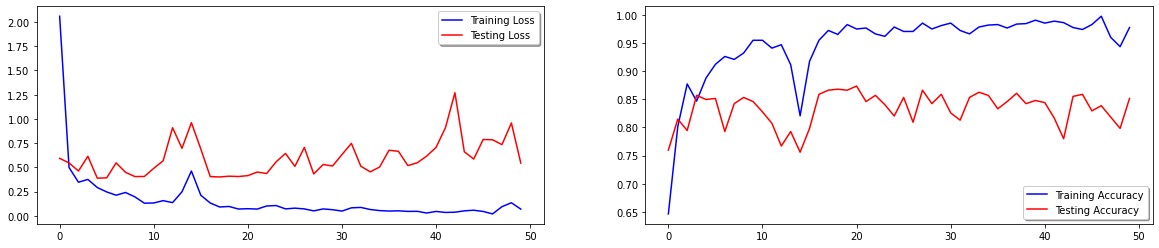

In [ ]:
fig, ax = plt.subplots(figsize=(20, 4), nrows=1, ncols=2)

ax[0].plot(r.history['loss'], color='b', label="Training Loss")
ax[0].plot(r.history['val_loss'], color='r', label="Testing Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(r.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(r.history['val_accuracy'], color='r',label="Testing Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
np.mean(r.history['accuracy']) # Rata - Rata hasil dari akurasi model

0.947630661725998

In [ ]:
model.save('vgg16model.h5')

##Old

In [ ]:
# Menambahkan Layer untuk Preprocessing pada VGG
vgg16 = VGG16(input_shape = IMAGE_SIZE + [3], 
            weights = 'imagenet',
            include_top=False)


# Untuk perintah menolak men training data yang telah digunakan sebelumnya
for layer in vgg16.layers:
  layer.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
x1 = Flatten()(vgg16.output)
x1 = Dense(1000, activation='relu')(x)

# Lapisan Terakhir dengan aktivasi sigmoid untuk output biner 
prediction1 = Dense(len(categories), activation='sigmoid')(x)

In [ ]:
baseModel = VGG16(include_top=False, input_tensor=Input(shape=(50, 50, 3)))

In [ ]:
baseModel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

In [ ]:
class FCHeadNet:
  def build(baseModel, classes, D):
    headModel = baseModel.output
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(D, activation='elu')(headModel)
    headModel = Dropout(0.5)(headModel)
    headModel = Dense(classes, activation='sigmoid')(headModel)
    return headModel

In [ ]:
headModel = FCHeadNet.build(baseModel, 1, 256)
model1 = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
for layer in baseModel.layers:
  layer.trainable = False

In [ ]:
model1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [ ]:
from tensorflow.keras.optimizers import Adam

model1.compile(optimizer=Adam(lr=1e-3), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [ ]:
from sklearn.metrics import classification_report
ypred = model.predict(training_set)
prediction = np.argmax(ypred, axis=1)
print(classification_report(training_set.classes, prediction))

ValueError: ignored